<center>
    <h1>Systèmes intelligents et apprentissage machine</h1>
    <h2>ETS GTI770 (Eté 2018)</h2>
    <h2>Travaux Pratiques:  Rapport TP01</h2>
    <h4>Equipe 5 : Fabeleu Kouemo Carole, Illy Poulmanogo, Ouedraogo Thierry</h4>
</center>

## Introduction
Avec les liens fournis en l’annexe de cet énoncé et avec vos trouvailles faites sur Internet par le biais de vos recherches personnelles, faites, à titre d’introduction, une revue de la littérature. Celle-ci doit faire état des recherches ayant été faites en la matière et des possibles pistes que vous pourriez suivre durant ce laboratoire pour effectuer l’extraction de primitives sur les images de galaxies.

## I. Chargement des images et pré-traitements

### I.1. Chargement des données

Nous avons téléchargé le dataset fourni depuis Moodle pour ce TP. Nous fesons un chargement, en utilisant le fichier GTI770_label_data_set.csv, des 50 premières données de chaque classe. Toutes les images sont chargées dans une matice (X) et les labels dans une matrice (Y). X a la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur) et Y la forme(nombre d'image, la classe).

In [16]:
import numpy as np
import os
import cv2

#Chargement du fichier CSV contenant le classement des images
csvFile = open("Dataset_GTI770\csv\GTI770_label_data_set.csv", "r")
#Definition de la matrice pour charger les 100 images (50 pour chacun des deux classes (smooth, spiral))
# Toutes les images de dataset sont de format (424, 424,3)
X = np.zeros((100, 424, 424,3))
#Y = np.array((100,10), dtype=object)
Y = np.zeros(100, dtype='object')
nombre_img_smooth = 0
nombre_img_spiral = 0
count = 0
#Parcourir le fichier CSV ligne par ligne
for i in csvFile :
    #Recuperation des valeurs de deux colonnes
    id, classe = i.split(",")
    #Sauter la ligne des attributs (meta-données)
    if id == "id":
        continue
    #Control de la limitation de la taille du dataset
    if "smooth" in classe and nombre_img_smooth < 50 : 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_smooth+=1
        count += 1
    if "spiral" in classe and nombre_img_spiral < 50: 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_spiral+=1
        count += 1
    if count >= 100 :
        break
print("Chargement du dataset terminé")
print("Nombre d'images : ", count)
print("Nombre d'images smooth : ", nombre_img_smooth)
print("Nombre d'images spiral : ", nombre_img_spiral)

print("Cellule executée avec succès")

Chargement du dataset terminé
Nombre d'images :  100
Nombre d'images smooth :  50
Nombre d'images spiral :  50
Cellule executée avec succès


### I.2. Vérification des données chargées
Nous affichons de manière aléatoire de 2 images de chaque classes.

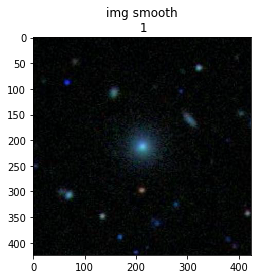

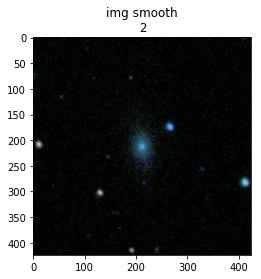

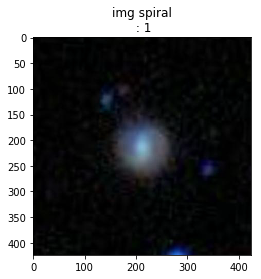

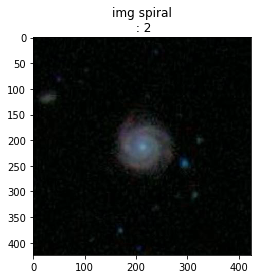

Cellule executée avec succès


In [17]:
import matplotlib.pyplot as plt
import random
# Selection aléatoire des 2 images de chaque classe
j = 0
k = 0
img_smooth_ids = np.zeros(50)
img_spiral_ids = np.zeros(50)
for i in range(100):
    if "smooth" in Y[i] :
        img_smooth_ids[j] = i
        j+=1
    if "spiral" in Y[i] :
        img_spiral_ids[k] = i
        k+=1
img_spiral_sample_ids = random.sample(list(img_spiral_ids),2)
img_smooth_sample_ids = random.sample(list(img_smooth_ids),2)

# Affichage des 2 images sélectionnés de chaque classe
numero = 1
for id in img_smooth_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" "+str(numero))
    numero+=1
    plt.show()
numero = 1
for id in img_spiral_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" : "+str(numero))
    numero+=1
    plt.show()

print("Cellule executée avec succès")

### I.3. Séparation des données d'apprentissage et des données de test
Nous fesons une séparation des données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), ces 2 matrices doivent avoir le même nombre de classes. Nous faison la même chose pour (Y). Les données ont toujours les mêmes classes.

In [18]:
# Selection aléatoire de 35 images de chaque classe
img_spiral_train_sample_ids = random.sample(list(img_spiral_ids),35)
img_smooth_train_sample_ids = random.sample(list(img_smooth_ids),35)
# construction du X_train et Y_train de 70 images
X_train = np.zeros((70, 424, 424,3))
Y_train = np.zeros(70, dtype='object')
train_data_index = 0
for i in img_spiral_train_sample_ids :
    i = int(i)
    X_train[train_data_index] = X[i]
    Y_train[train_data_index] = Y[i]
    train_data_index+=1
    #print(""+Y[i]+""+str(train_data_index))
for i in img_smooth_train_sample_ids :
    i = int(i)
    X_train[train_data_index] = X[i]
    Y_train[train_data_index] = Y[i]
    train_data_index+=1
    #print(""+Y[i]+""+str(train_data_index))

# Selection des 30 images restantes de chaque classe
img_test_sample_ids = np.zeros(30)
#img_spiral_train_sample_ids
j = 0
#print(img_test_sample_ids)
for i in img_spiral_ids :
    if i not in img_spiral_train_sample_ids :
        img_test_sample_ids[j] = i
        #print(i)
        j+=1
for i in img_smooth_ids :
    if i not in img_smooth_train_sample_ids :
        img_test_sample_ids[j] = i
        #print(i)
        j+=1
#print(img_test_sample_ids)

# construction du X_test et Y_test de 30 images
X_test = np.zeros((30, 424, 424,3))
Y_test = np.zeros(30, dtype='object')
test_data_index = 0
for i in img_test_sample_ids :
    i = int(i)
    X_test[test_data_index] = X[i]
    Y_test[test_data_index] = Y[i]
    test_data_index+=1
    #print(""+Y[i]+""+str(test_data_index))

print("Dataset partionné en X_train, Y_train, X_test, Y_test")
print("Cellule executée avec succès")

Dataset partionné en X_train, Y_train, X_test, Y_test
Cellule executée avec succès


### I.4. Pré-traitements des données d'apprentissage
Pour éliminer certains bruits, notamment les étoiles lointaines dans l’arrière-plan, nous fesons un cropp de toutes  les images en utilisant le centre de l'image. La nouvelle dimension fait 50x50. Nous n'utilisons que numpy pour cela. Toutes les images croppées sont dans une matrice(X_train_crop)

In [19]:
# Definition d'une fonction qui cropp une image à partir du centre et selon les nouvelles tailles données
def cropper_centre(img, nouveauX, nouveauY):
    milieuX = img.shape[0]/2
    debutX = int(milieuX - nouveauX/2)
    finX = int(milieuX + nouveauX/2)
    milieuY = img.shape[1]/2
    debutY = int(milieuY - nouveauY/2)
    finY = int(milieuY + nouveauY/2)
    img = img[debutX:finX, debutY:finY, :]
    return img
#Teste de notre fonction avec une image, 100259.jpg
#imagePath = 'Dataset_GTI770\images_training/100259.jpg'
#img = cv2.imread(imagePath)
#plt.imshow(img)
#plt.show()
#print(img.shape)
#imgcrop = cropper_centre(img, 50, 50)
#print(imgcrop.shape)
#plt.imshow(imgcrop)
#plt.figure()

#Cropp de toutes les images dans X_train vers X_train_crop
X_train_crop = np.zeros((70, 50, 50,3))
X_train_crop_index = 0
for i in X_train:
    X_train_crop[X_train_crop_index] = cropper_centre(X_train[X_train_crop_index], 50, 50)
    X_train_crop_index+=1
print("Cellule executée avec succès")

Cellule executée avec succès


### I.5. Visualisation des données pré-traitées
Nous affichage une image de chaque catégorie avec le crop.

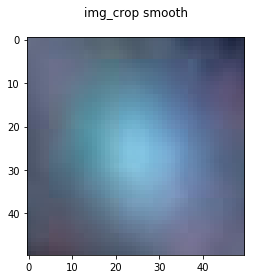

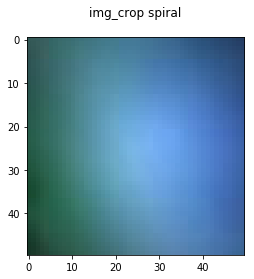

Cellule executée avec succès


In [20]:
X_train_crop_index = 0
nb_plt_smooth = 0
nb_plt_spiral = 0
for i in Y_train:
    if "smooth" in Y[X_train_crop_index] and nb_plt_smooth == 0:
        plt.imshow(X_train_crop[X_train_crop_index]/255)
        plt.title("img_crop "+Y[X_train_crop_index])
        plt.show()
        X_train_crop_index+=1
        nb_plt_smooth=1
    else :
        if "spiral" in Y[X_train_crop_index] and nb_plt_spiral == 0:
            plt.imshow(X_train_crop[X_train_crop_index]/255)
            plt.title("img_crop "+Y[X_train_crop_index])
            plt.show()
            X_train_crop_index+=1
            nb_plt_spiral=1
    if nb_plt_smooth == 0 and nb_plt_spiral == 0 :
        break
print("Cellule executée avec succès")

## II. Choix de primitives, extractions et évaluation

### II.1. Première primitive : (nom de la primitive)


#### II.1.1. Choix de la primitive 
Explication de la primitive

#### II.1.2. Extraction de la première primitive

#### II.1.3. Evaluation de la première primitive